In [23]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNetV2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

In [6]:
dataset_path = r'C:\Users\aasis\Downloads\Mid-model Exam\Mid-model Exam\horse-or-human\horse-or-human'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    batch_size=16,
    target_size = (150,150),
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    batch_size=16,
    target_size = (150,150),
    class_mode = 'binary',
    subset = 'validation'
)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


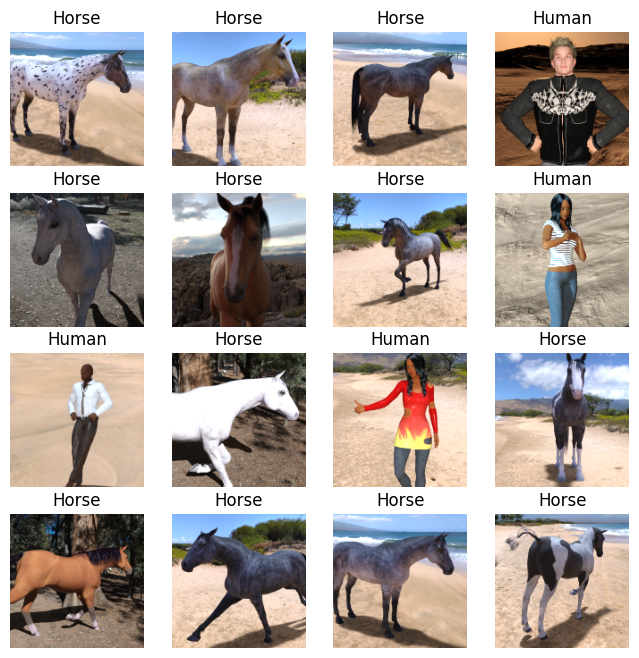

In [12]:
def plot_sample(generator):
    # x - image and y - label
    x,y = next(generator)
    plt.figure(figsize=(8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title("Horse" if y[i] == 0 else "Human")
        plt.axis('off')
    plt.show()

plot_sample(train_generator)



In [19]:
def create_model(base_model):
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

vgg16_base = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
mobilenet_base = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')



C:\Users\aasis\AppData\Local\Temp\ipykernel_15444\3597771950.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [20]:
for layer in vgg16_base.layers:
    layer.trainable = False

for layer in mobilenet_base.layers:
    layer.trainable = False

vgg16_model = create_model(vgg16_base)
mobileNet_model = create_model(mobilenet_base)

In [21]:
epochs = 3

print("Training VGG16 model")
vgg16_model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

print("Training MobileNetV2 model")
mobileNet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Training VGG16 model
Epoch 1/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8233 - loss: 0.2914 - val_accuracy: 0.7463 - val_loss: 0.7784
Epoch 2/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.7512 - val_loss: 0.7592
Epoch 3/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8098 - val_loss: 0.6117
Training MobileNetV2 model
Epoch 1/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9153 - loss: 0.6476 - val_accuracy: 0.9854 - val_loss: 0.2834
Epoch 2/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.9954 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 2.8752e-10
Epoch 3/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 1.0000 - loss: 5.0764e-07 - val_accuracy: 1.0000 - val_loss: 1.5099e-10


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7916 - loss: 0.6970
For VGG16
Accuracy :0.8097561001777649 and Loss :0.6117320656776428
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


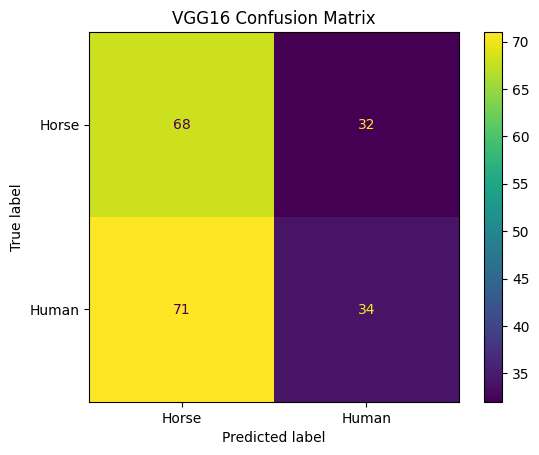

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 1.0000 - loss: 1.8665e-10
For MobileNetV2
Accuracy :1.0 and Loss :1.50988041514033e-10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step


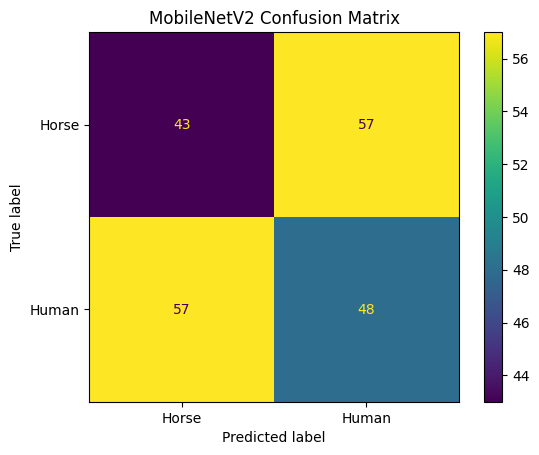

In [24]:
def evaluate_model(model, generator, title):
    loss, accuracy = model.evaluate(generator)
    print(f"For {title}")
    print(f'Accuracy :{accuracy} and Loss :{loss}')

    y_true = generator.classes
    y_pred = (model.predict(generator) > 0.5).astype('int32')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    ConfusionMatrixDisplay(conf_matrix, display_labels=['Horse', 'Human']).plot()
    plt.title(f"{title} Confusion Matrix")
    plt.show()

evaluate_model(vgg16_model, validation_generator, "VGG16")
evaluate_model(mobileNet_model, validation_generator, "MobileNetV2")

VGG16 Model Predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


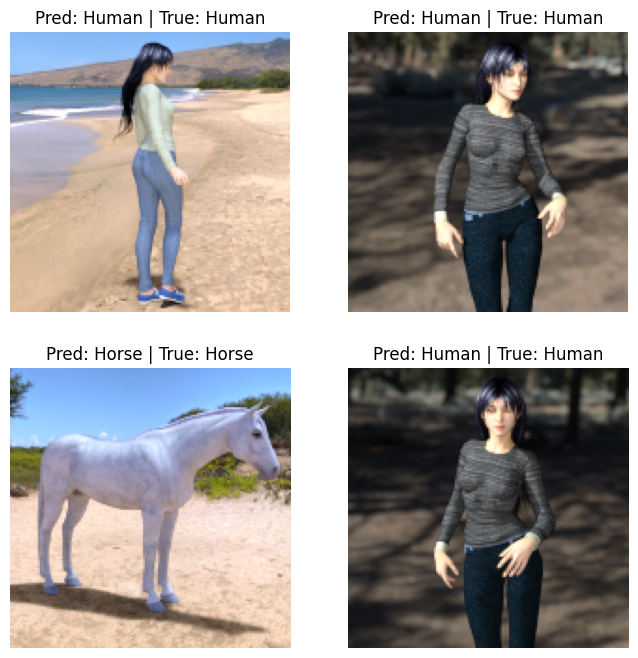

MobileNetV2 Model Predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


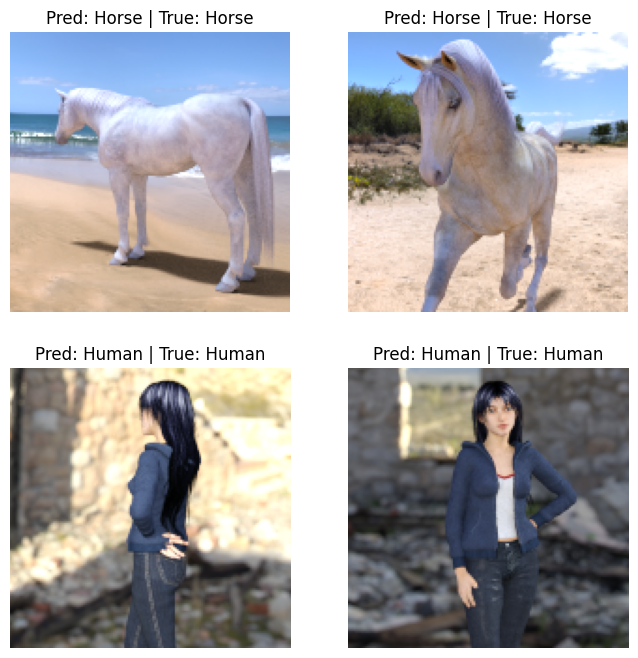

In [26]:
# Visualize predictions
def plot_predictions(model, generator):
    #It uses the next(generator) function to fetch a batch of images (x) and their true labels (y_true).
    x, y_true = next(generator)
    y_pred = (model.predict(x) > 0.5).astype("int32")
    plt.figure(figsize=(8, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(x[i])
        plt.title(f"Pred: {'Horse' if y_pred[i][0] == 0 else 'Human'} | True: {'Horse' if y_true[i] == 0 else 'Human'}")
        plt.axis('off')
    plt.show()

# Plot predictions for VGG16 and MobileNetV2 models
print("VGG16 Model Predictions")
plot_predictions(vgg16_model, validation_generator)

print("MobileNetV2 Model Predictions")
plot_predictions(mobileNet_model, validation_generator)

VGG16 Model Classification
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


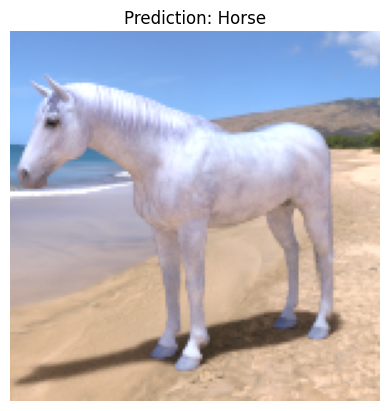

The model predicts this image is a Horse
MobileNetV2 Model Classification
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


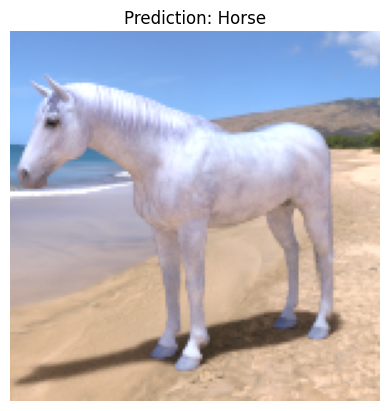

The model predicts this image is a Horse


In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
# Function to classify a single image
def classify_image(model, img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to match training

    # Make prediction
    prediction = model.predict(img_array)
    label = "Horse" if prediction < 0.5 else "Human"
    
    # Display the image with the prediction
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    print(f"The model predicts this image is a {label}")

# Usage example:
# Replace 'your_image_path.jpg' with the path to the image you want to classify
image_path = r'C:\Users\aasis\Downloads\Mid-model Exam\Mid-model Exam\horse-or-human\horse-or-human-20241104T062424Z-001\horse-or-human\horses\horse01-1.png'

# Use VGG16 model to classify the image
print("VGG16 Model Classification")
classify_image(vgg16_model, image_path)

# Use MobileNetV2 model to classify the image
print("MobileNetV2 Model Classification")
classify_image(mobileNet_model, image_path)